In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

 Load the dataset

In [ ]:
df=pd.read_csv('/content/healthcare_dataset.csv')

Data Exploration

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [ ]:
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Visualization


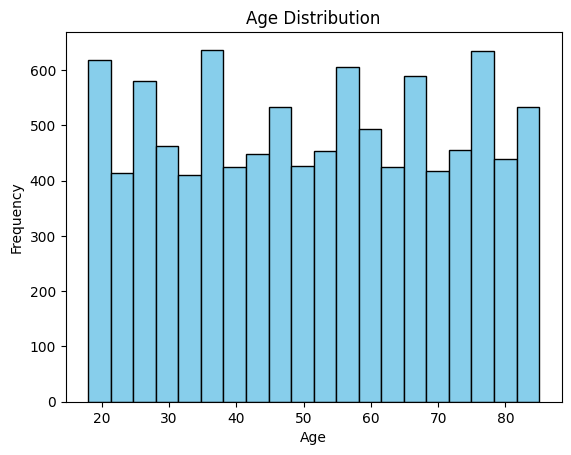

In [ ]:
# Age distribution
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


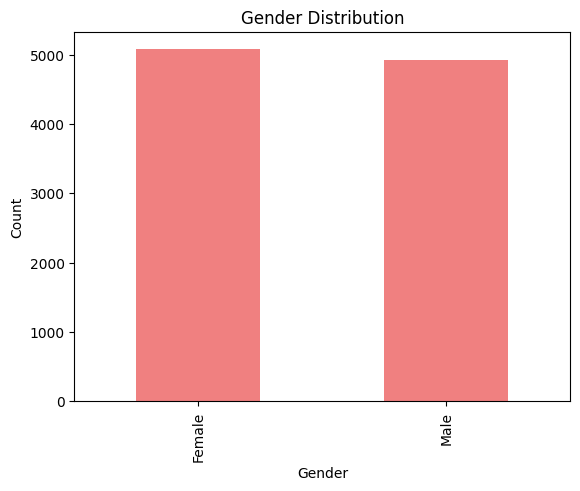

In [ ]:
# Gender distribution
df['Gender'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

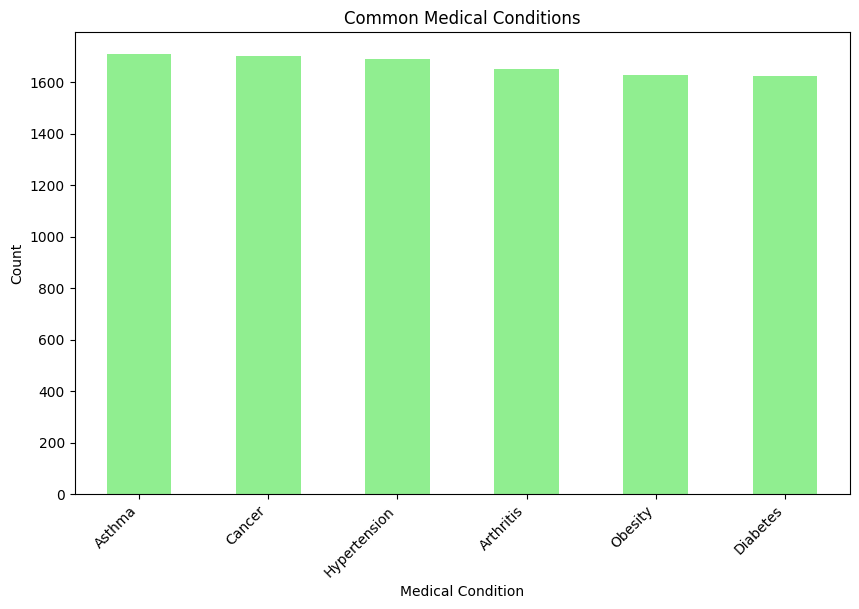

In [ ]:
# Common medical conditions
plt.figure(figsize=(10, 6))
df['Medical Condition'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Common Medical Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

 Analyze treatment patterns, including common medications prescribed and test results distribution.

In [ ]:


#Extract medications and test results
medications = df['Medication'].str.split(', ').explode().dropna()
test_results = df['Test Results'].str.split(', ').explode().dropna()


In [ ]:
#Count frequencies of medications and test results
medication_counts = medications.value_counts()
test_result_counts = test_results.value_counts()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Penicillin'),
  Text(1, 0, 'Lipitor'),
  Text(2, 0, 'Ibuprofen'),
  Text(3, 0, 'Aspirin'),
  Text(4, 0, 'Paracetamol')])

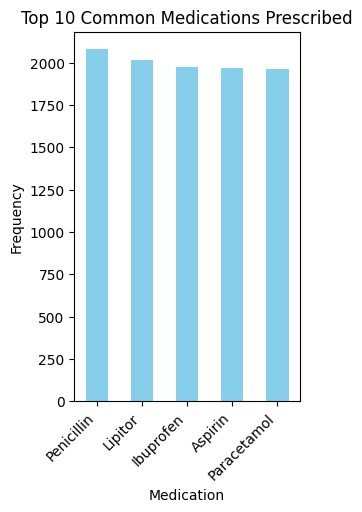

In [ ]:
# Plot common medications prescribed
plt.subplot(1, 2, 1)
top_medication_counts = medication_counts.head(10)  # Select top 10 most common medications
top_medication_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Common Medications Prescribed')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


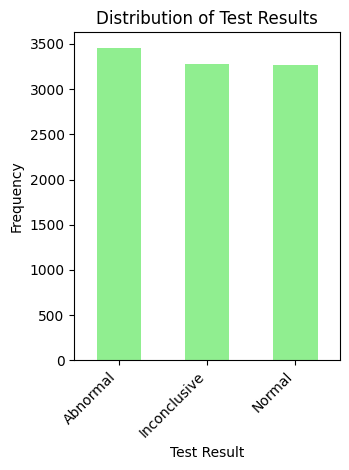

In [ ]:
# Plot distribution of test results
plt.subplot(1, 2, 2)
test_result_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

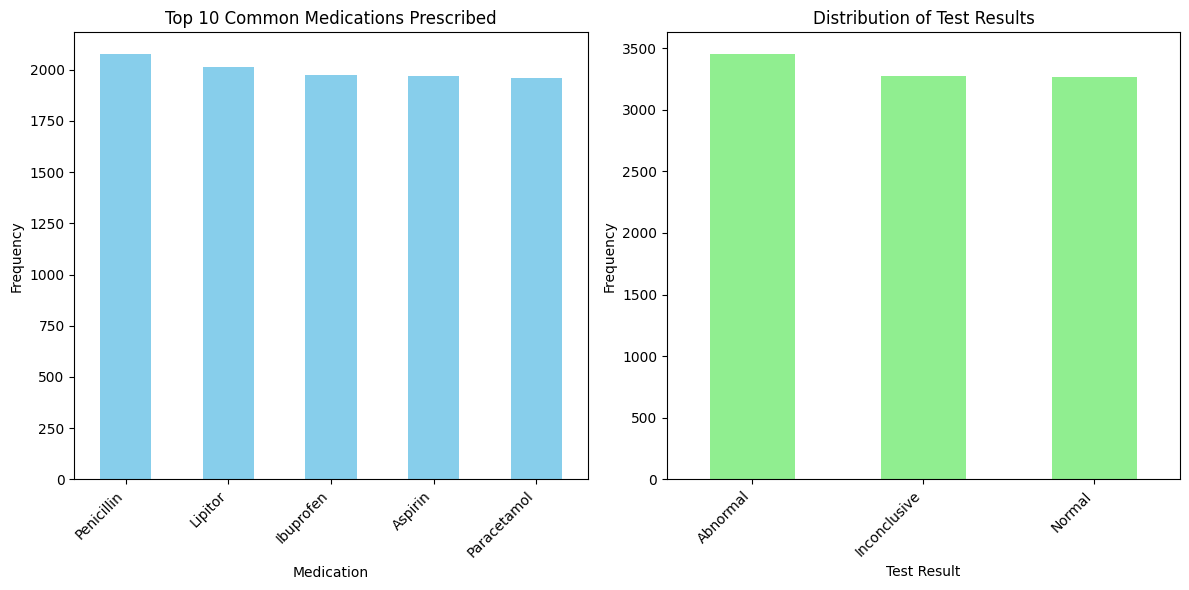

In [ ]:
#Extract medications and test results
medications = df['Medication'].str.split(', ').explode().dropna()
test_results = df['Test Results'].str.split(', ').explode().dropna()

#Count frequencies of medications and test results
medication_counts = medications.value_counts()
test_result_counts = test_results.value_counts()

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot common medications prescribed
plt.subplot(1, 2, 1)
top_medication_counts = medication_counts.head(10)  # Select top 10 most common medications
top_medication_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Common Medications Prescribed')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Plot distribution of test results
plt.subplot(1, 2, 2)
test_result_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


 Develop a predictive model to forecast the billing amount for future patient admissions based on historical data and patient characteristics such as age, gender, medical condition, and insurance provider.

Feature Engineering


In [ ]:
#Feature Selection
features = ['Age', 'Gender', 'Medical Condition', 'Insurance Provider']
target = 'Billing Amount'
X = df[features]
y = df[target]

In [ ]:
# Encoding categorical variables--one hot encoding
X_encoded = pd.get_dummies(X)

Random Forest Regression


In [ ]:
# Model Development
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 13498.270227766749
Mean Squared Error (MSE): 262145058.44300506
Root Mean Squared Error (RMSE): 16190.894306461427


Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print("Linear Regression - Mean Absolute Error (MAE):", mae_lr)


Linear Regression - Mean Absolute Error (MAE): 12272.045270364246


Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print("Decision Tree Regression - Mean Absolute Error (MAE):", mae_dt)


Decision Tree Regression - Mean Absolute Error (MAE): 14674.830510412328


Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print("Gradient Boosting Regression - Mean Absolute Error (MAE):", mae_gb)


Gradient Boosting Regression - Mean Absolute Error (MAE): 12292.038093827845


In [ ]:
print("Linear Regression - Mean Absolute Error (MAE):", mae_lr)
print("Decision Tree Regression - Mean Absolute Error (MAE):", mae_dt)
print("Random Forest Regression - Mean Absolute Error (MAE):", mae)
print("Gradient Boosting Regression - Mean Absolute Error (MAE):", mae_gb)


Linear Regression - Mean Absolute Error (MAE): 12272.045270364246
Decision Tree Regression - Mean Absolute Error (MAE): 14674.830510412328
Random Forest Regression - Mean Absolute Error (MAE): 13498.270227766749
Gradient Boosting Regression - Mean Absolute Error (MAE): 12292.038093827845


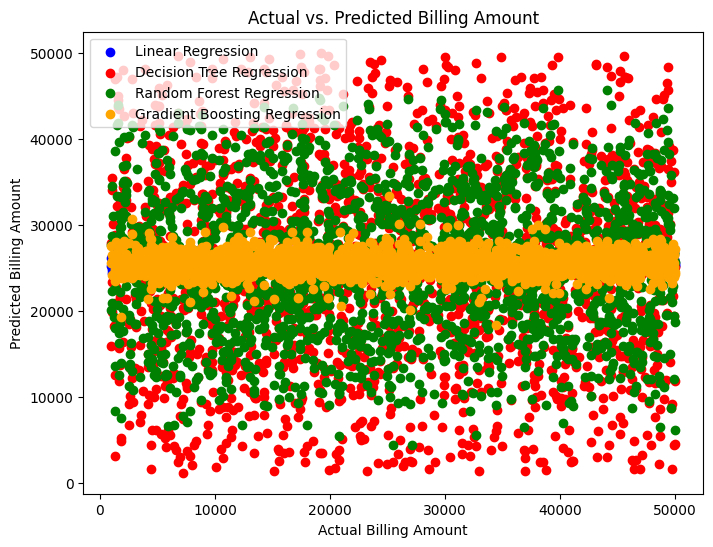

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_dt, color='red', label='Decision Tree Regression')
plt.scatter(y_test, y_pred, color='green', label='Random Forest Regression')
plt.scatter(y_test, y_pred_gb, color='orange', label='Gradient Boosting Regression')
plt.xlabel('Actual Billing Amount')
plt.ylabel('Predicted Billing Amount')
plt.title('Actual vs. Predicted Billing Amount')
plt.legend()
plt.show()
